# Model-independent constraints on scalar operators from $B_s\to\mu^+\mu^-$

Companion notebook to the paper "$B_s\to\mu^+\mu^-$ as current and future probe of new physics by W. Altmannshofer, C. Niehoff, and D. M. Straub [1]

Based on [flavio](https://flav-io.github.io/) v0.19

revision 1, 2017-02-17

## Imports and notebook settings

In [1]:
import flavio
import flavio.plots
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.rc('text', usetex=True)
plt.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
from fits import fast_fit, fast_fit_future, bayesian_fit, get_fit_prediction
flavio.__version__

'0.19'

## Fast fits: make pseudo measurements

The "fast fits" combine correlated experimental and theoretical uncertainties into one big "pseudo-mesurement". This takes a few minutes. But once this is done, plotting is blazing fast.

In [2]:
%%time
fast_fit.make_measurement(N=200)
for fit in fast_fit_future.values():
    fit.make_measurement(N=200)

CPU times: user 3min 19s, sys: 100 ms, total: 3min 19s
Wall time: 3min 19s


## Constraints on a single Wilson coefficient

This is fig. 2 of [1]

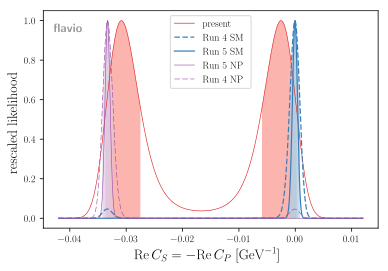

In [3]:
# generate 1D numerical distribution for CS (present data)...

# ... for CS < -0.015
x = np.linspace(-0.042, -0.015, 200)
y = np.exp([fast_fit.log_likelihood([X, 0, 0, 0]) for X in x])
d_now_1 = flavio.statistics.probability.NumericalDistribution(x, y)

# ... for CS > -0.015
x = np.linspace(-0.015, 0.012, 200)
y = np.exp([fast_fit.log_likelihood([X, 0, 0, 0]) for X in x])
d_now_2 = flavio.statistics.probability.NumericalDistribution(x, y)

# plot the likelihood!
flavio.plots.pdf_plot(d_now_1, normed='max')
flavio.plots.pdf_plot(d_now_2, normed='max', label='present')

# style definitions for the future scenarios
d_fut = {}
style = {
    'Run 4 NP': {'plotargs': {'ls': '--', 'color': '#222222'},
                 'fillargs': {'facecolor': '#333333', 'alpha':0.6}},
    'Run 5 NP': {'plotargs': {'ls': '-', 'color': '#222222'},
                 'fillargs': {'facecolor': '#333333', 'alpha':0.6}},
    'Run 4 SM': {'plotargs': {'ls': '--', 'color': flavio.plots.colors.set1[1], 'alpha': 0.8},
                 'fillargs': {'facecolor': flavio.plots.colors.set1[1], 'alpha':0.4}},
    'Run 5 SM': {'plotargs': {'ls': '-', 'color': flavio.plots.colors.set1[1], 'alpha': 0.8},
                 'fillargs': {'facecolor': flavio.plots.colors.set1[1], 'alpha':0.4}},
}
style = {
    'Run 4 NP': {'col': 3, 'plotargs': {'ls': '--', 'alpha': 1},   'fillargs': {'alpha': 0.7}},
    'Run 5 NP': {'col': 3, 'plotargs': {'ls': '-',  'alpha': 1},   'fillargs': {'alpha': 0.7}},
    'Run 4 SM': {'col': 1, 'plotargs': {'ls': '--', 'linewidth':1.2}, 'fillargs': {'alpha': 0.7}},
    'Run 5 SM': {'col': 1, 'plotargs': {'ls': '-',  'linewidth':1.2}, 'fillargs': {'alpha': 0.7}},
}
x = np.linspace(-0.042, 0.012, 1000)
for i, future in enumerate(style):

    # generate 1D numerical distributions for the future scenarios
    y = np.exp([fast_fit_future[future].log_likelihood([X, 0, 0, 0]) for X in x])
    d_fut[future] = flavio.statistics.probability.NumericalDistribution(x, y)

    # plot the likelihood!
    flavio.plots.pdf_plot(d_fut[future], steps=1000, normed='max', label=future, **style[future])

# legends & labels
plt.legend()
flavio.plots.flavio_branding(x=0.03)
plt.xlabel(r'$\mathrm{Re}\,C_S=-\mathrm{Re}\,C_P ~[\mathrm{GeV}^{-1}]$')
plt.ylabel('rescaled likelihood');

## Constraints on a pair of Wilson coefficients

This is fig. 3 of [1]

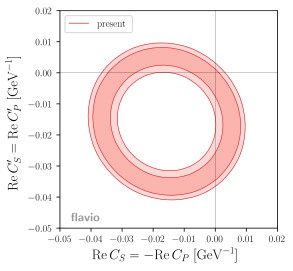

In [4]:
# setting some options
plt.figure(figsize=(4,4))
opt = dict(x_min=-0.05, x_max=0.02, y_min=-0.05, y_max=0.02, n_sigma=(1,2), interpolation_factor=5)

# plot!
flavio.plots.likelihood_contour(lambda x: fast_fit.log_likelihood([x[0], 0, x[1], 0]), col=0,
                                label='present', **opt)

# labels, legend, etc.
flavio.plots.flavio_branding(y=0.07, x=0.05)
plt.gca().set_aspect(1)
plt.axhline(0, c='k', lw=0.2)
plt.axvline(0, c='k', lw=0.2)
plt.legend()
plt.xlabel(r'$\mathrm{Re}\,C_S=-\mathrm{Re}\,C_P ~[\mathrm{GeV}^{-1}]$')
plt.ylabel(r'$\mathrm{Re}\,C_S^\prime= \mathrm{Re}\,C_P^\prime ~[\mathrm{GeV}^{-1}]$');

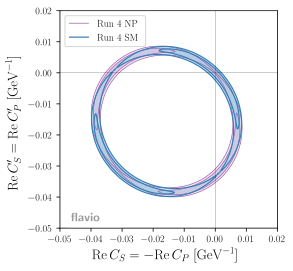

In [5]:
plt.figure(figsize=(4,4))

# Run 4 plots
flavio.plots.likelihood_contour(lambda x: fast_fit_future['Run 4 NP'].log_likelihood([x[0], 0, x[1], 0]),
                   col=3, label='Run 4 NP', steps=50, **opt)
flavio.plots.likelihood_contour(lambda x: fast_fit_future['Run 4 SM'].log_likelihood([x[0], 0, x[1], 0]),
                   col=1, label='Run 4 SM', steps=50, contour_args={'linewidths':1.2}, **opt)



# labels, legend, etc.
flavio.plots.flavio_branding(y=0.07, x=0.05)
plt.gca().set_aspect(1)
plt.axhline(0, c='k', lw=0.2)
plt.axvline(0, c='k', lw=0.2)
plt.legend()
plt.xlabel(r'$\mathrm{Re}\,C_S=-\mathrm{Re}\,C_P ~[\mathrm{GeV}^{-1}]$')
plt.ylabel(r'$\mathrm{Re}\,C_S^\prime= \mathrm{Re}\,C_P^\prime ~[\mathrm{GeV}^{-1}]$');

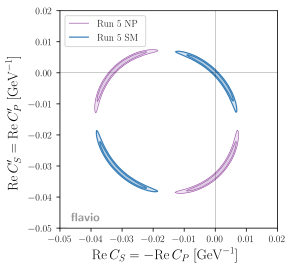

In [6]:
plt.figure(figsize=(4,4))

# Run 5 plots
flavio.plots.likelihood_contour(lambda x: fast_fit_future['Run 5 NP'].log_likelihood([x[0], 0, x[1], 0]),
                   col=3, label='Run 5 NP', steps=50, **opt)
flavio.plots.likelihood_contour(lambda x: fast_fit_future['Run 5 SM'].log_likelihood([x[0], 0, x[1], 0]),
                   col=1, label='Run 5 SM', steps=50, contour_args={'linewidths':1.2}, **opt)

# labels, legend, etc.
flavio.plots.flavio_branding(y=0.07, x=0.05)
plt.gca().set_aspect(1)
plt.axhline(0, c='k', lw=0.2)
plt.axvline(0, c='k', lw=0.2)
plt.legend()
plt.xlabel(r'$\mathrm{Re}\,C_S=-\mathrm{Re}\,C_P ~[\mathrm{GeV}^{-1}]$')
plt.ylabel(r'$\mathrm{Re}\,C_S^\prime= \mathrm{Re}\,C_P^\prime ~[\mathrm{GeV}^{-1}]$');

## Bayesian fit with complex $C_S$ and $C_S'$

This is fig. 4 left of [1].

The MCMC was actually done in a separate script, but it could also be done directly in the notebook like so:

```python
from flavio.statistics.fitters import emcee
scan = emcee.emceeScan(fit, threads=4)
scan.run(steps=10000, burnin=100)
data = scan.result
```

The `data` array could be saved for later reuse simply using `np.save` and `np.load`.

In [7]:
def get_chain(f):
    arr = np.load(os.path.join(data_dir, f))
    return arr
import os, re
data_dir = os.path.join(os.path.expanduser('~'), 'Data', 'flavio')
data_files = [f for f in os.listdir(data_dir) if re.match('emcee_CS-CSp_SMEFT_Bayesian_fit_v0\.19_9.*\.npy', f)]
data = np.vstack([get_chain(f) for f in data_files])

In [8]:
data.shape

(1200000, 12)

Recast the result array into a nice dictionary

In [9]:
all_parameters = bayesian_fit.fit_parameters + bayesian_fit.nuisance_parameters + list(bayesian_fit.fit_wc_names)
data_dict = {p: data[:,i] for i, p in enumerate(all_parameters)}

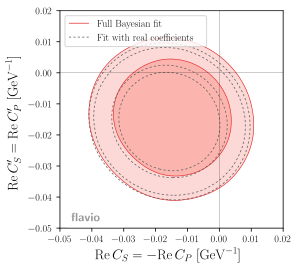

In [10]:
#some options
plt.figure(figsize=(4,4))
opt = dict(x_min=-0.05, x_max=0.02, y_min=-0.05, y_max=0.02, n_sigma=(1,2), interpolation_factor=5)

# plot the posterior!
flavio.plots.density_contour(data_dict['ReCS'], data_dict['ReCSp'], covariance_factor=0.5, interpolation_factor=2,
                             label='Full Bayesian fit')

# plot the above plot again with dashed lines
flavio.plots.likelihood_contour(lambda x: fast_fit.log_likelihood([x[0], 0, x[1], 0]),
                   col=0, filled=False, contour_args={'linestyles':':', 'colors':'#666666'},
                               label='Fit with real coefficients', **opt)

# labels, legend, etc.
plt.axhline(0, c='k', lw=0.2)
plt.axvline(0, c='k', lw=0.2)
plt.xlim([-0.05,0.02]);
plt.ylim([-0.05,0.02]);
flavio.plots.flavio_branding(y=0.07, x=0.05) # "flavio" watermark
plt.xlabel(r'$\mathrm{Re}\,C_S=-\mathrm{Re}\,C_P ~[\mathrm{GeV}^{-1}]$')
plt.ylabel(r'$\mathrm{Re}\,C_S^\prime= \mathrm{Re}\,C_P^\prime ~[\mathrm{GeV}^{-1}]$')
plt.legend();

## Bayesian posterior prediction for $F_H$ and $S_6^c$

This is fig. 4 right of [1].
Since computing these observables is time consuming, below we only do it for 1% of the points. For the original plots, 10% where used.

In [11]:
%%time
FH_lo_post = np.array([get_fit_prediction(bayesian_fit, ('<FH>(B+->Kmumu)', 1.1, 6), d) for d in data[::100]])
FH_hi_post = np.array([get_fit_prediction(bayesian_fit, ('<FH>(B+->Kmumu)', 15, 22), d) for d in data[::100]])
S6c_post = np.array([get_fit_prediction(bayesian_fit, ('<S6c>(B0->K*mumu)', 1.1, 6), d) for d in data[::100]])

CPU times: user 13min 16s, sys: 600 ms, total: 13min 17s
Wall time: 13min 16s


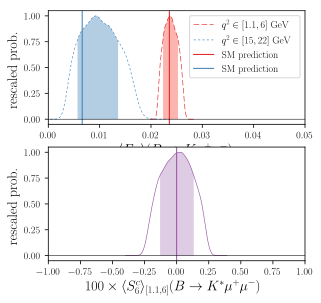

In [12]:
plt.figure(figsize=(4.6,4.6))

plt.subplot(211)
ax = plt.gca()

# FH at low q2
flavio.plots.smooth_histogram(FH_lo_post, col=0,
                              bandwidth=0.0002,
                              label=r'$q^2 \in [1.1, 6]$ GeV', plotargs={'ls':'--'}, normed='max')


# FH at high q2
flavio.plots.smooth_histogram(FH_hi_post, col=1,
                              bandwidth=0.0007,
                              label=r'$q^2 \in [15, 22]$ GeV', plotargs={'ls':':'}, normed='max')

# SM predictions
ax.axvline(flavio.sm_prediction('<FH>(B+->Kmumu)', 1.1, 6),
            c=flavio.plots.colors.set1[0], lw=1, label='SM prediction')
ax.axvline(flavio.sm_prediction('<FH>(B+->Kmumu)', 15, 22),
            c=flavio.plots.colors.set1[1], lw=1, label='SM prediction')

# labels, legend
plt.xlim([0, 0.05]);
ax.axhline(0, c='k', lw=0.5)
plt.xlabel(r'$\langle F_H \rangle(B\to K\mu^+\mu^-)$')
plt.ylabel(r'rescaled prob.')
plt.legend()

plt.subplot(212)
ax = plt.gca()

# S6c
flavio.plots.smooth_histogram(100*S6c_post, col=3,
                              bandwidth=0.02,
                              label=r'', normed='max')
# SM prediction
ax.axvline(flavio.sm_prediction('<S6c>(B0->K*mumu)', 1.1, 6),
            c=flavio.plots.colors.set1[3], lw=1, label='SM prediction')

# labels
plt.xlim([-1, 1]);
ax.axhline(0, c='k', lw=0.5)
plt.xlabel(r'$100\times \langle S_6^c \rangle_{[1.1, 6]}(B\to K^*\mu^+\mu^-)$')
plt.ylabel(r'rescaled prob.');